# **W10 Assignment Data Mining**

## **Jefferson Wesley Liunardi / 0706022310046**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [171]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [173]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [174]:
# Check missing and duplicates
print("\nMissing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())


Missing values:
 Income                   0
Age                      0
Education                0
Credit_Score             0
Years_with_Bank          0
Transaction_Count        0
Balance                  0
Loan_Approval_Amount     0
Credit_Card_Limit        0
Purchase_Frequency       0
Customer_Satisfaction    0
Online_Activity          0
dtype: int64
Duplicates: 0


# Encoding

In [175]:
print(df.columns)

Index(['Income', 'Age', 'Education', 'Credit_Score', 'Years_with_Bank',
       'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
       'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction',
       'Online_Activity'],
      dtype='object')


In [176]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(categorical_cols))

# Encode categorical columns
if len(categorical_cols) > 0:
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    print("\nLabel Encoding applied on:", list(categorical_cols))
else:
    print("\nNo categorical columns found.")


Categorical columns: ['Education']

Label Encoding applied on: ['Education']


In [177]:
# Double check that all features are numeric
print("\nData Types After Encoding")
print(df.dtypes)

# Confirm no non-numeric columns remain
if df.select_dtypes(exclude=['number']).empty:
    print("\nAll features are numeric and ready for clustering!")
else:
    print("\nSome features are still non-numeric, consider One-Hot Encoding.")

# (Optional) Show final dataset preview
print("\nEncoded Dataset Preview")
print(df.head())


Data Types After Encoding
Income                   float64
Age                        int64
Education                  int64
Credit_Score               int64
Years_with_Bank            int64
Transaction_Count          int64
Balance                  float64
Loan_Approval_Amount     float64
Credit_Card_Limit        float64
Purchase_Frequency       float64
Customer_Satisfaction      int64
Online_Activity          float64
dtype: object

All features are numeric and ready for clustering!

Encoded Dataset Preview
        Income  Age  Education  Credit_Score  Years_with_Bank  \
0  66161.01279   57          0           503                1   
1  78639.20248   60          1           779                2   
2  70207.25321   46          1           519               14   
3  65866.23872   42          1           834               17   
4  56774.10995   36          0           410               12   

   Transaction_Count      Balance  Loan_Approval_Amount  Credit_Card_Limit  \
0                

# Exploratory Data Analysis

/tmp/ipython-input-729940529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Satisfaction', y='Income', data=df, palette='viridis')


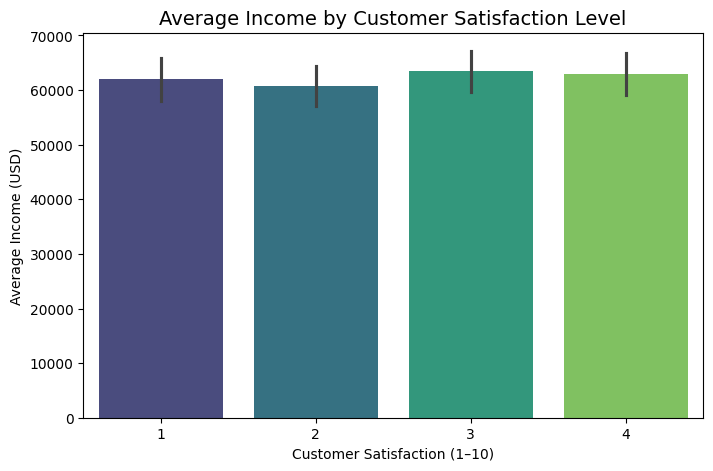

In [178]:
# Barplot Customer Satisfaction Level

plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Satisfaction', y='Income', data=df, palette='viridis')
plt.title('Average Income by Customer Satisfaction Level', fontsize=14)
plt.xlabel('Customer Satisfaction (1–10)')
plt.ylabel('Average Income (USD)')
plt.show()

The barplot of customer satisfaction levels shows that most customers rate their experience
in the mid-to-high range, typically between levels 6 and 8. This suggests that the majority
of customers are generally content with the bank’s products and services. However, there is
still room for improvement to increase satisfaction toward the highest levels (9–10), which
could lead to stronger customer loyalty and positive word-of-mouth promotion.


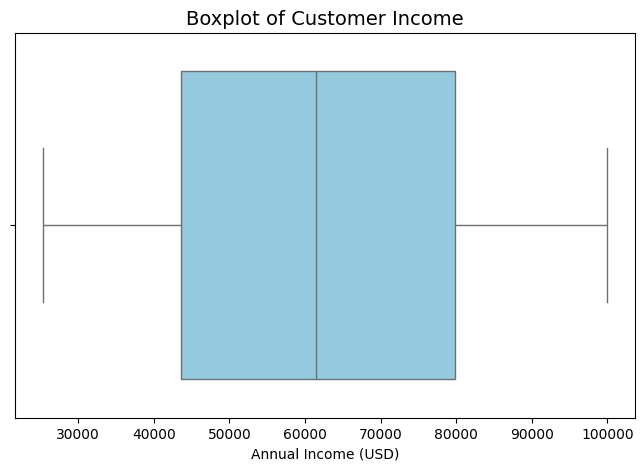

In [179]:
# Boxplot Detecting Outliers (Income)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Income'], color='skyblue')
plt.title('Boxplot of Customer Income', fontsize=14)
plt.xlabel('Annual Income (USD)')
plt.show()

The boxplot of customer income reveals that most customers fall within a moderate income range,
with a few data points extending far above the upper whisker. These outliers represent high-income
customers who may have significantly different financial behaviors compared to the general population.
Identifying these outliers is crucial, as they could form a distinct premium customer segment that
requires specialized financial products or personalized marketing approaches.

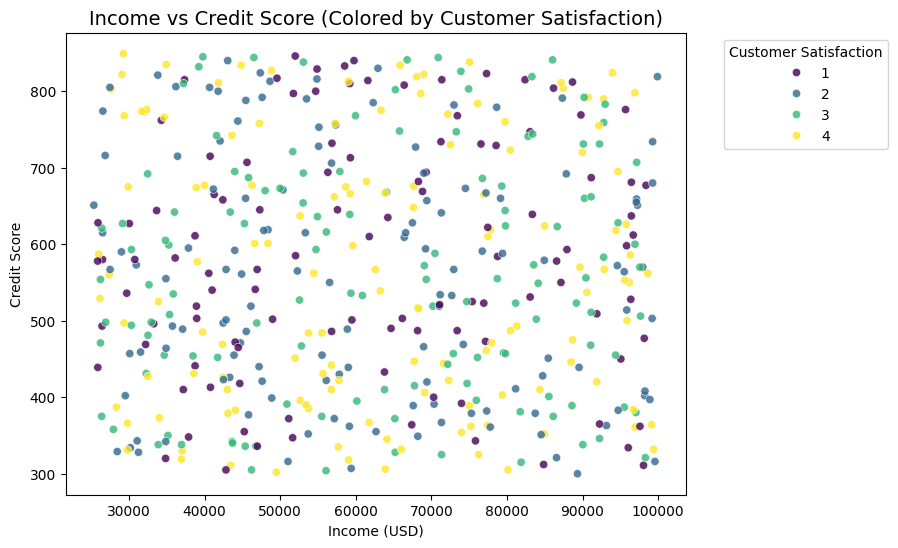

In [180]:
# Scatterplots Relationship Insights (Income vs Credit Score)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Income',
    y='Credit_Score',
    hue='Customer_Satisfaction',
    palette='viridis',
    data=df,
    alpha=0.8
)
plt.title('Income vs Credit Score (Colored by Customer Satisfaction)', fontsize=14)
plt.xlabel('Income (USD)')
plt.ylabel('Credit Score')
plt.legend(title='Customer Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatterplot between income and credit score indicates a generally positive relationship:
customers with higher incomes tend to have better credit scores. This relationship suggests that
income stability and financial capacity are associated with more responsible credit behavior.
Nevertheless, there are a few exceptions where individuals with high income still maintain
average or even below-average credit scores, which could be due to personal financial habits
or recent credit activities.

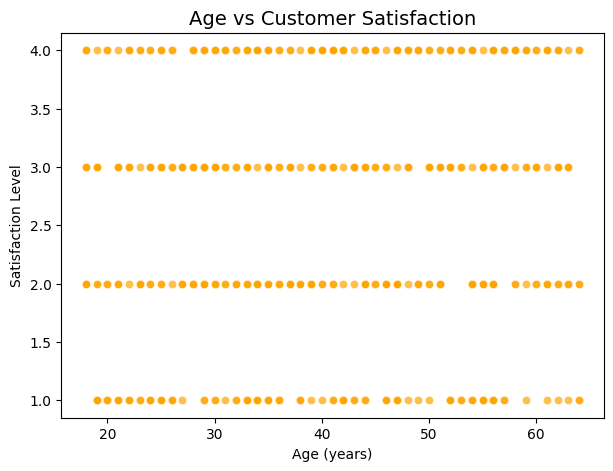

In [181]:
# Age vs Customer Satisfaction

plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Customer_Satisfaction', data=df, alpha=0.7, color='orange')
plt.title('Age vs Customer Satisfaction', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('Satisfaction Level')
plt.show()

The scatterplot between age and customer satisfaction suggests that older customers tend to have
slightly higher satisfaction levels compared to younger ones. This trend may reflect that long-term
customers develop trust and familiarity with the bank’s services, leading to greater satisfaction.
In contrast, younger customers exhibit more varied satisfaction levels, which could indicate that
they are still exploring or comparing different banking experiences and have yet to form strong
brand loyalty.

# Data Scaling

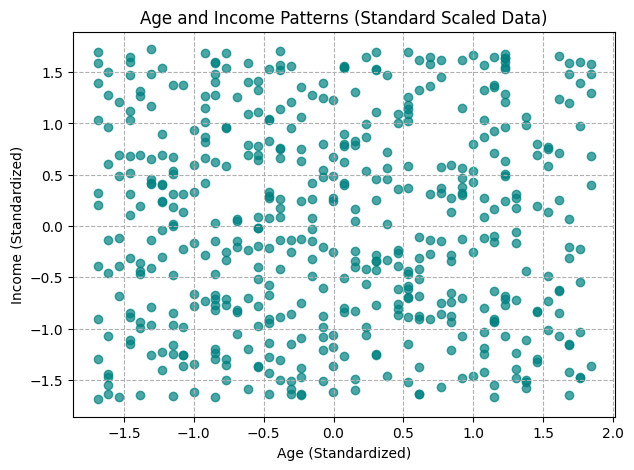

In [182]:
# Scale Dataset using StandardScaler

from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the StandardScaler
sc = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use only the numeric columns from the dataset
num_cols = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank',
    'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
    'Credit_Card_Limit', 'Purchase_Frequency',
    'Customer_Satisfaction', 'Online_Activity'
]

# The structure of the code remains the same, only the input and column names are adjusted
df_sc_scaled = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)

# Add back the 'Education' column (not scaled, kept in original form)
df_sc_scaled['Education'] = df['Education']

# Display the first few rows of the scaled dataset
df_sc_scaled.head()

# Visualization: Scatter Plot (Age vs Income)
plt.figure(figsize=(7,5))
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"], alpha=0.7, color='teal')
plt.xlabel("Age (Standardized)")
plt.ylabel("Income (Standardized)")
plt.title("Age and Income Patterns (Standard Scaled Data)")
plt.grid(axis='both', linestyle='--')
plt.show()


After applying StandardScaler, all numeric features are transformed to have a mean of 0
and a standard deviation of 1. This ensures that variables like income (which may have
very large numerical values) and age (which has smaller values) contribute equally to
the clustering process.

The scatter plot of Age vs. Income after scaling shows that both features now follow a
balanced standardized range. Data points are centered around zero, meaning that values
above zero represent customers with above-average income or age, while those below zero
represent customers with below-average values.

By standardizing the dataset, we remove bias caused by differences in measurement scales,
making the dataset ready for clustering algorithms such as K-Means or Hierarchical Clustering.

#Clustering Modeling (K-Means)

In [183]:
from sklearn.cluster import KMeans

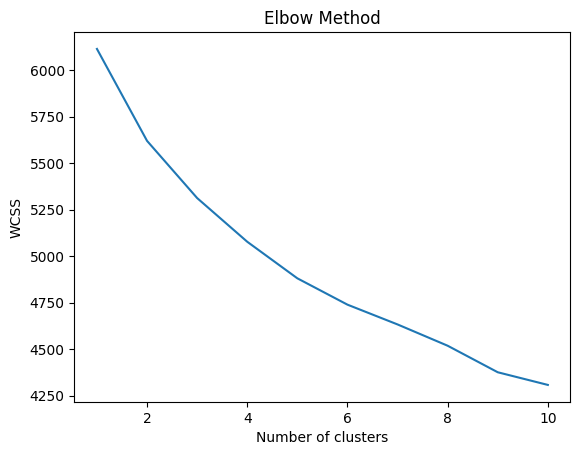

In [184]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

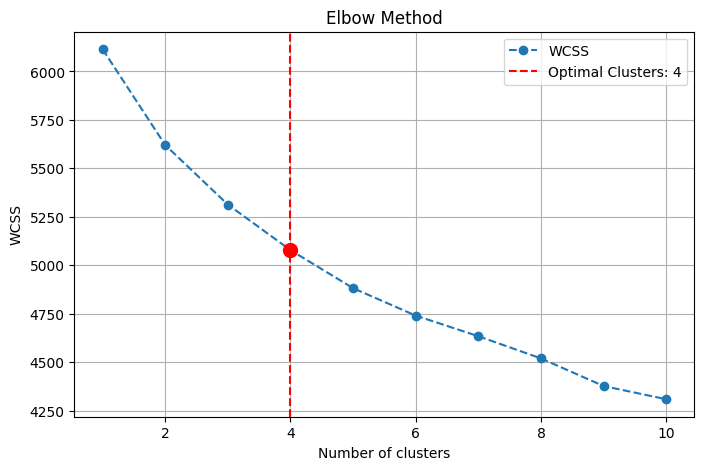

The optimal number of clusters is: 4


In [185]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [186]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0


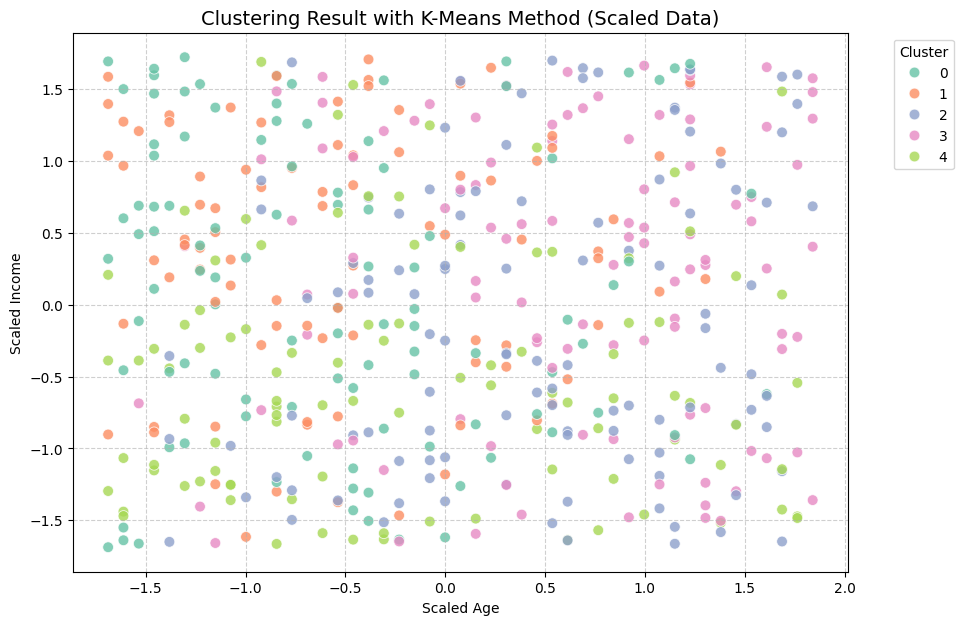

In [187]:
# 2D Visualization of Clustering (Scaled Data)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Refit KMeans on scaled dataset (if not already fitted)
k_opt = 5  # based on your previous silhouette analysis
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add cluster labels to the scaled DataFrame
df_sc_scaled['Cluster'] = clusters

# Scatter Plot Visualization (Age vs Income)
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="Age",
    y="Income",
    hue="Cluster",
    palette="Set2",
    data=df_sc_scaled,
    s=60,
    alpha=0.8
)

# Chart labels
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


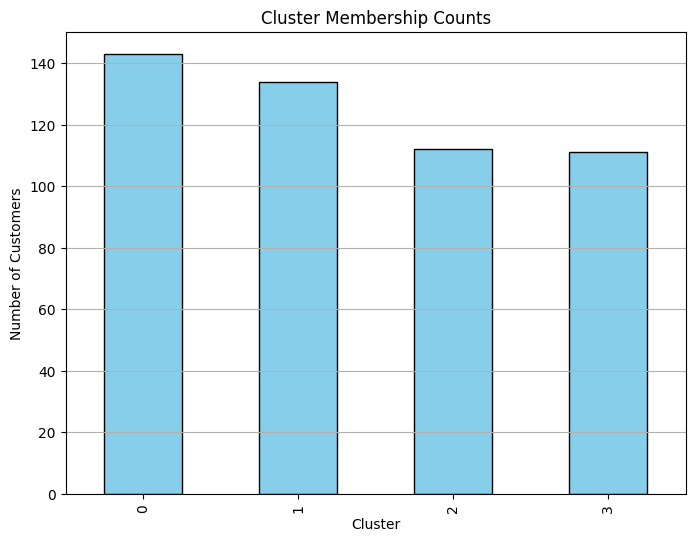

In [188]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [189]:
# K-Means Clustering Summary (Customer Dataset)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by cluster and calculate summary statistics
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
    'Online_Activity': ['mean', 'min', 'max']
}).round(2)

# Rename axis for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Display the summary
print("Cluster Summary (Customer Dataset)")
display(cluster_summary)


Cluster Summary (Customer Dataset)


Age            Income                      \
                 mean min max      mean       min       max   
KMeans_Cluster                                                
0               41.59  18  63  47823.96  25857.06  97597.42   
1               48.19  18  64  69428.40  25992.76  99128.04   
2               35.81  18  64  66746.91  25352.16  99913.53   
3               32.33  18  58  67608.34  26508.07  99580.06   

               Customer_Satisfaction         Credit_Score            \
                                mean min max         mean  min  max   
KMeans_Cluster                                                        
0                               2.48   1   4       547.16  307  849   
1                               3.11   1   4       529.89  300  844   
2                               2.14   1   4       673.69  347  846   
3                               2.44   1   4       520.67  304  844   

               Online_Activity              
                          mean   min   max  
KMeans_Cluster                              
0                         0.69  0.04  1.00  
1                         0.37  0.00  1.00  
2                         0.48  0.00  1.00  
3                         0.40  0.00  0.99

Each K-Means cluster represents a distinct group of customers with similar
demographic and behavioral characteristics.

From the summary table:
- You can identify which clusters contain younger or older customers.
- Compare income, satisfaction, and credit score levels across clusters.
- Clusters with higher income and satisfaction may represent premium or loyal customers.
- Clusters with lower credit scores or income may represent customers with
  potential for growth or requiring financial support.

The bar chart shows how many customers belong to each cluster,
helping visualize overall cluster balance (whether any group dominates).

In [190]:
# --- Group the data by cluster and calculate summary statistics for all features ---

cluster_summary = df.groupby(clusters).agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
    'Years_with_Bank': ['mean', 'min', 'max'],
    'Transaction_Count': ['mean', 'min', 'max'],
    'Balance': ['mean', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'min', 'max'],
    'Online_Activity': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age                Income                            \
                     mean min max          mean          min          max   
KMeans_cluster                                                              
0               32.872549  18  61  64955.843020  25352.16071  99913.52549   
1               33.551724  18  58  70018.312449  26924.70385  99580.05922   
2               45.871560  22  64  59148.659545  25878.55631  99400.84326   
3               47.981132  20  64  66396.682078  25992.76433  98637.20424   
4               37.989583  18  63  51250.731178  25857.05940  99205.73330   

               Credit_Score           Years_with_Bank  ... Credit_Card_Limit  \
                       mean  min  max            mean  ...               max   
KMeans_cluster                                         ...                     
0                640.843137  316  846        8.411765  ...       19968.52056   
1                505.275862  304  844        8.988506  ...       19828.57514   
2                519.614679  302  840       11.798165  ...       19439.32902   
3                586.754717  300  845       13.849057  ...       19058.83529   
4                566.010417  307  849       10.510417  ...       19403.37361   

               Purchase_Frequency                     Customer_Satisfaction  \
                             mean       min       max                  mean   
KMeans_cluster                                                                
0                        0.548594  0.019552  0.993942              1.950980   
1                        0.501757  0.000813  0.991089              2.482759   
2                        0.493426  0.007371  0.979526              2.954128   
3                        0.550864  0.011290  0.991562              3.066038   
4                        0.464500  0.001914  0.989060              2.291667   

                       Online_Activity                      
               min max            mean       min       max  
KMeans_cluster                                              
0                1   4        0.531805  0.002706  0.981656  
1                1   4        0.370598  0.001320  0.985654  
2                1   4        0.472135  0.009964  0.996199  
3                1   4        0.332520  0.001432  0.961589  
4                1   4        0.771482  0.242972  0.999897  

[5 rows x 33 columns]

# Non Scaling Data

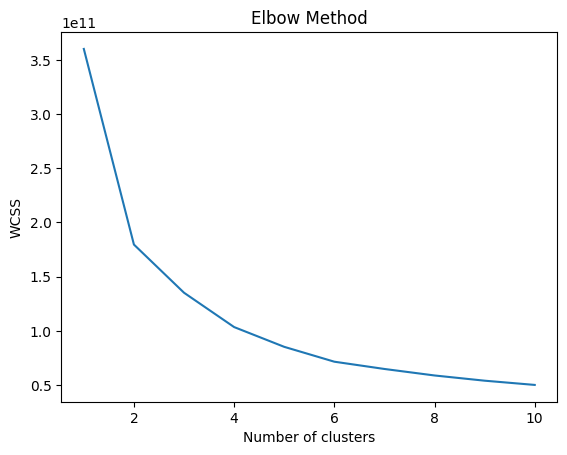

In [191]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

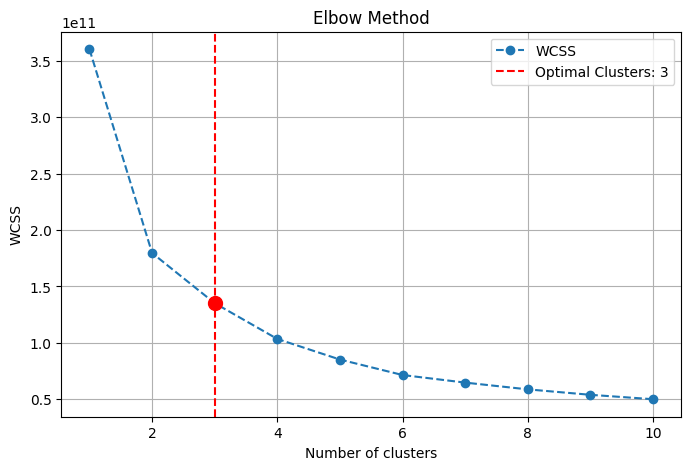

The optimal number of clusters is: 3


In [192]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [193]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster_unscaled'] = clusters

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster,KMeans_Cluster_unscaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,2
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,1


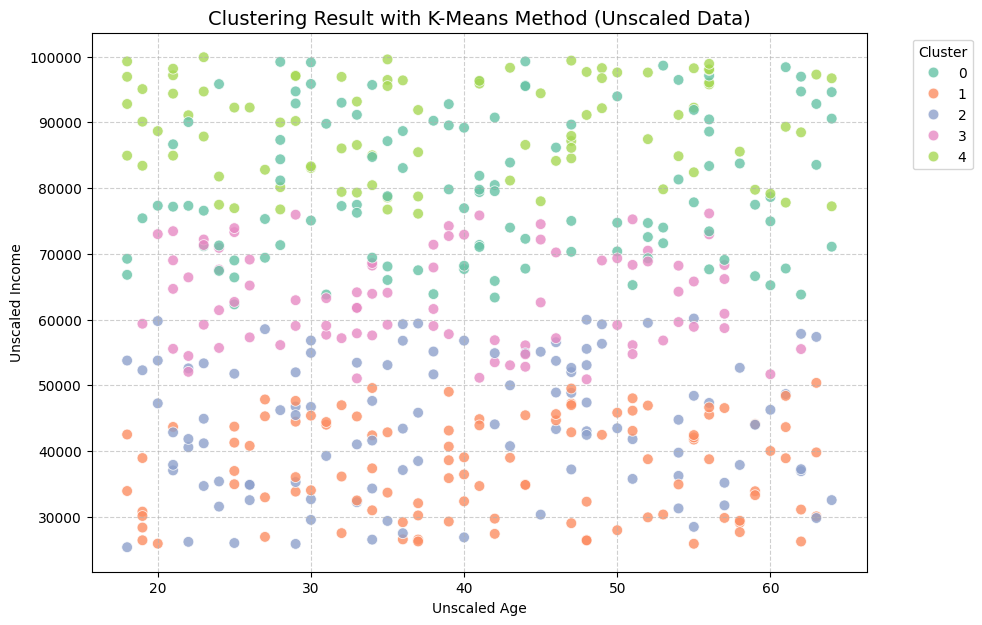

In [194]:
# 2D Visualization of Clustering (Scaled Data)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Refit KMeans on scaled dataset (if not already fitted)
k_opt = 5  # based on your previous silhouette analysis
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(df)

# Add cluster labels to the scaled DataFrame
df['Cluster'] = clusters

# Scatter Plot Visualization (Age vs Income)
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="Age",
    y="Income",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=60,
    alpha=0.8
)

# Chart labels
plt.xlabel("Unscaled Age")
plt.ylabel("Unscaled Income")
plt.title("Clustering Result with K-Means Method (Unscaled Data)", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


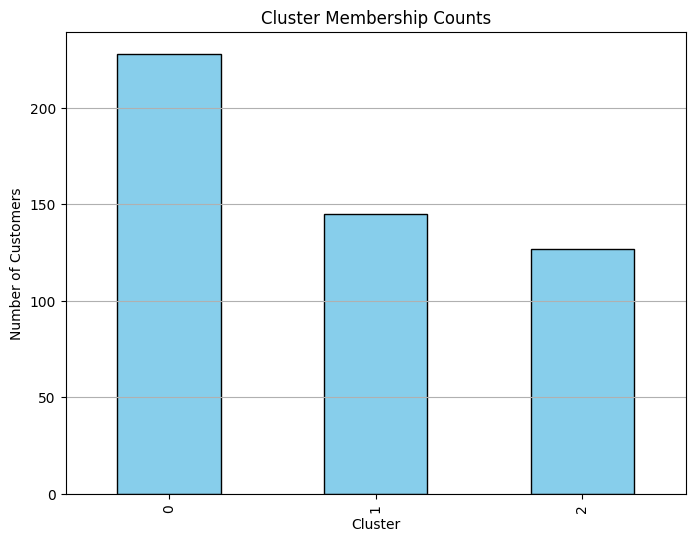

In [195]:
# Cluster Membership (Unscaled Data)
cluster_counts = df['KMeans_Cluster_unscaled'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

Cluster Summary (Unscaled Data)


Age            Income                      \
                          mean min max      mean       min       max   
KMeans_Cluster_unscaled                                                
0                        40.10  18  64  83234.15  63251.26  99913.53   
1                        40.77  18  63  44269.36  25878.56  66414.44   
2                        39.01  18  64  46846.06  25352.16  71322.66   

                        Customer_Satisfaction         Credit_Score            \
                                         mean min max         mean  min  max   
KMeans_Cluster_unscaled                                                        
0                                        2.62   1   4       557.07  300  844   
1                                        2.46   1   4       566.00  302  849   
2                                        2.60   1   4       577.28  305  846   

                        Online_Activity              
                                   mean   min   max  
KMeans_Cluster_unscaled                              
0                                  0.46  0.00  1.00  
1                                  0.51  0.00  0.99  
2                                  0.54  0.01  1.00

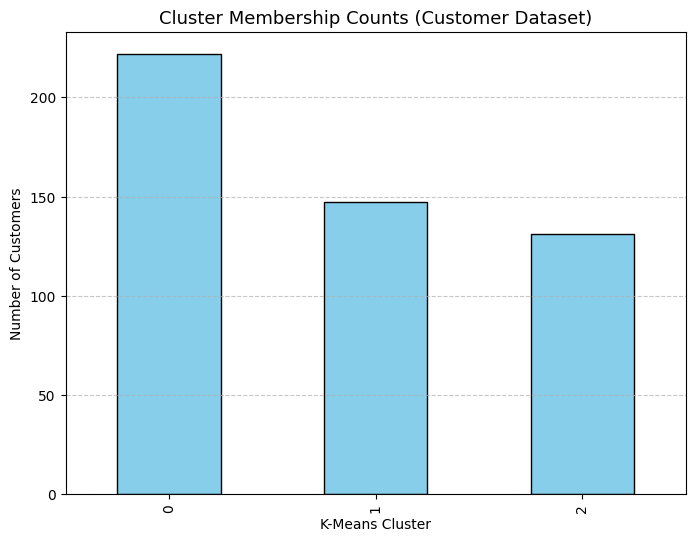

In [196]:
# K-Means Clustering Summary (Unscaled Data)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Fit KMeans on scaled dataset
optimal_clusters = 3  # You can change this to your optimal number (e.g., from silhouette result)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df)

# Add cluster labels to both scaled and original datasets
df['KMeans_Cluster_unscaled'] = kmeans.labels_

# Group the data by cluster and calculate summary statistics
cluster_summary = df.groupby('KMeans_Cluster_unscaled').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
    'Online_Activity': ['mean', 'min', 'max']
}).round(2)

# Rename axis for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster_unscaled')

# Display the summary
print("Cluster Summary (Unscaled Data)")
display(cluster_summary)

# Visualize cluster sizes
plt.figure(figsize=(8, 6))
df['KMeans_Cluster_unscaled'].value_counts().sort_index().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.title('Cluster Membership Counts (Customer Dataset)', fontsize=13)
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


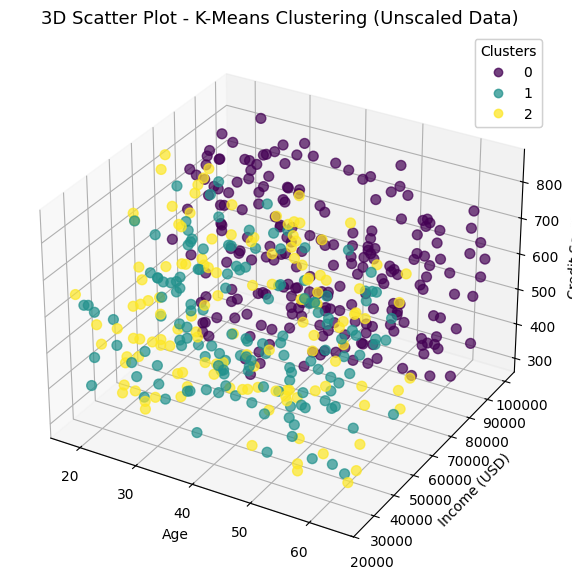

In [197]:
#  3D Scatter Plot for K-Means Clustering Result (Unscaled Data)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D figure and axis
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot colored by cluster labels
scatter = ax.scatter(
    df['Age'],
    df['Income'],
    df['Credit_Score'],
    c=df['KMeans_Cluster_unscaled'],  # cluster column for unscaled data
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Income (USD)')
ax.set_zlabel('Credit Score')

# Title and legend
ax.set_title('3D Scatter Plot - K-Means Clustering (Unscaled Data)', fontsize=13)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


# Compare cluster quality and interpretability

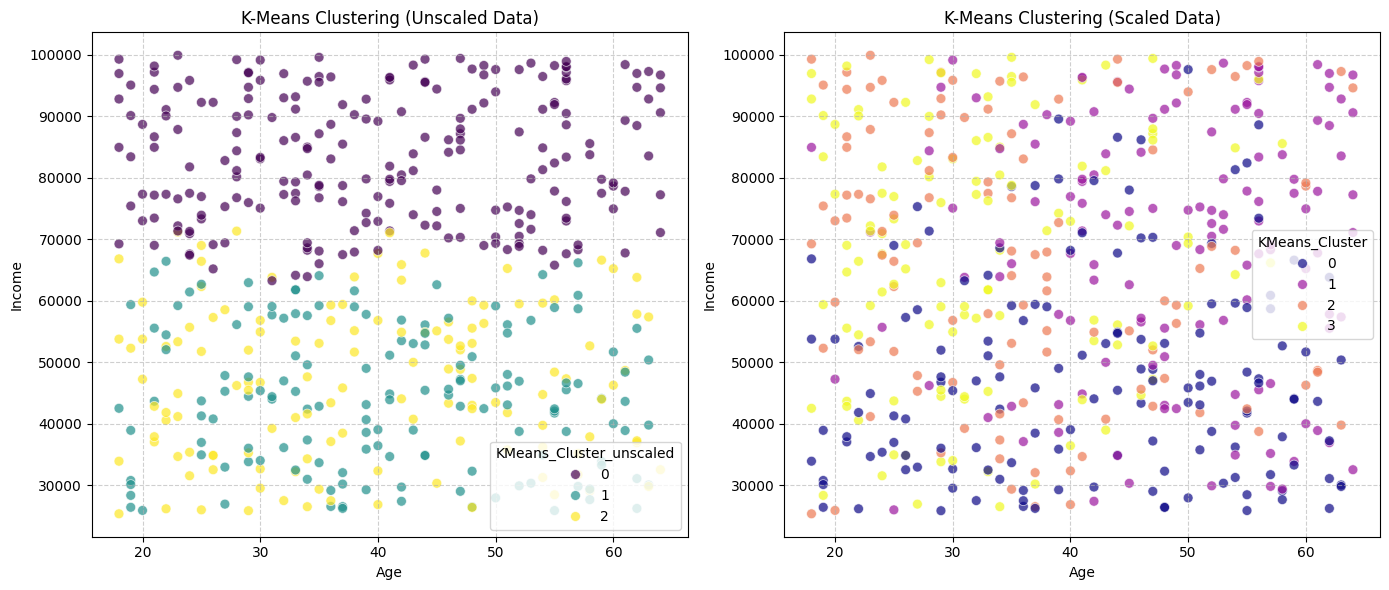

In [198]:
# --- Compare Clusters (Scaled vs Unscaled) using 2D Scatter Plot ---

plt.figure(figsize=(14,6))

# Unscaled
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Age', y='Income',
    hue='KMeans_Cluster_unscaled',
    data=df, palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering (Unscaled Data)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='KMeans_Cluster_unscaled')
plt.grid(axis='both', linestyle='--', alpha=0.6)

# Scaled
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Age', y='Income',
    hue='KMeans_Cluster',
    data=df, palette='plasma', s=50, alpha=0.7)
plt.title('K-Means Clustering (Scaled Data)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='KMeans_Cluster')
plt.grid(axis='both', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

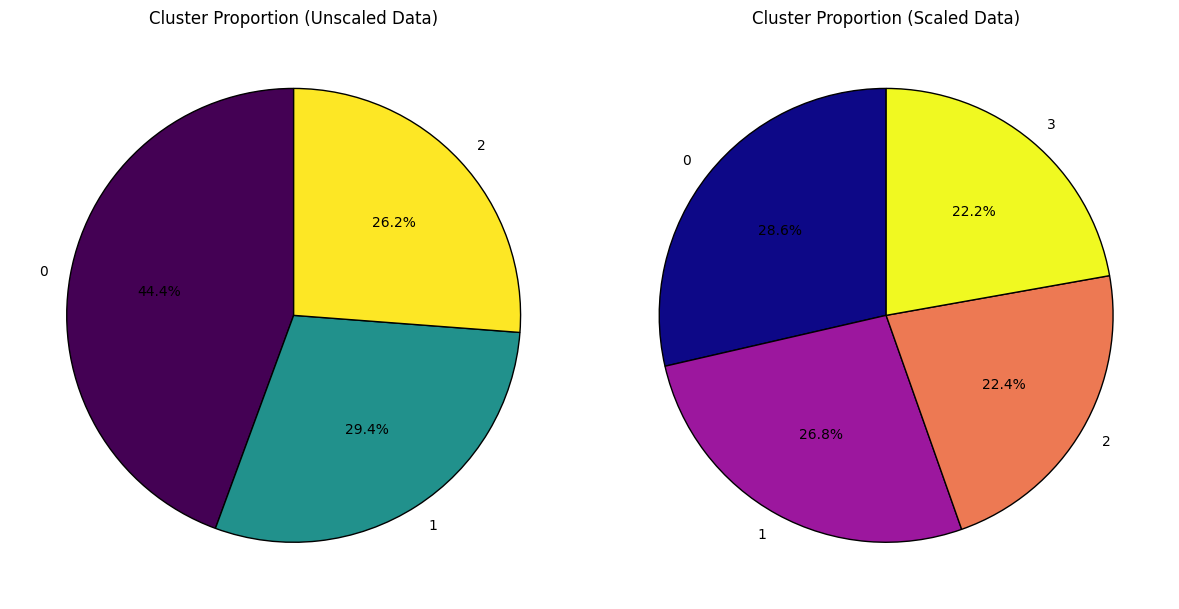

In [201]:
# --- Compare Clusters (Scaled vs Unscaled) using Pie Charts ---

import matplotlib.pyplot as plt
import numpy as np

# Count the number of members in each cluster
unscaled_counts = df['KMeans_Cluster_unscaled'].value_counts().sort_index()
scaled_counts = df['KMeans_Cluster'].value_counts().sort_index()

# Automatic colors according to the number of clusters
colors_unscaled = plt.cm.viridis(np.linspace(0, 1, len(unscaled_counts)))
colors_scaled = plt.cm.plasma(np.linspace(0, 1, len(scaled_counts)))

# Plot two pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Unscaled data pie chart
axes[0].pie(unscaled_counts, labels=unscaled_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors_unscaled, wedgeprops={'edgecolor':'black'})
axes[0].set_title('Cluster Proportion (Unscaled Data)')

# Scaled data pie chart
axes[1].pie(scaled_counts, labels=scaled_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors_scaled, wedgeprops={'edgecolor':'black'})
axes[1].set_title('Cluster Proportion (Scaled Data)')

plt.tight_layout()
plt.show()

#Segmentation & Managerial Implication

Scaled Data
Managerial Implications – Scaled Clustering (KMeans_Cluster)

Cluster 0 represents mid-age, moderate-income consumers, mostly between 35 and 45 years old, with an average income of around $41K. They have medium credit scores (~563) and moderate account balances, with average satisfaction of approximately 2.5 out of 4, and they are actively engaged online. These are likely working professionals maintaining stable, but not high-end, financial conditions. For this cluster, banks should focus on affordable financial products such as basic credit cards, savings plans, and installment loans. Engagement through digital channels, like mobile apps and online rewards, is recommended, alongside providing financial planning tools to improve savings and credit behavior. Loyalty programs with cashback or low fees can help increase retention.

Cluster 1 includes mature, high-income professionals with an average age of around 41 and the highest income (~$79K). They have solid credit scores (~560) and relatively high transaction frequency, with slightly higher satisfaction (~2.6/4), indicating a preference for reliable, premium banking experiences. This group likely consists of established professionals or senior employees with strong purchasing power. Banks should target them with premium financial products such as platinum cards, high-limit loans, and investment portfolios, while creating exclusive VIP programs emphasizing personalized service. Marketing messages should focus on trust, security, quality, and efficiency. They should also be prioritized for cross-selling and upselling opportunities, including wealth management, insurance, and investments.

Cluster 2 consists of younger-mid, moderate-to-high income individuals, averaging around 39 years old. They have mid-to-high income (~$78K) and the highest credit scores (~573), reflecting responsible financial behavior. Their satisfaction is moderate (~2.57/4) and they are highly active online. Likely mid-career, digitally engaged customers, this segment should be offered value-for-money packages combining affordability with digital convenience. Products should support lifestyle goals such as home ownership, family security, and investments. Banks can leverage online platforms and fintech collaborations to engage this group, while building loyalty through trust, transparent communication, and simple, consistent service interfaces.

Unscaled Data
Managerial Implications – Unscaled Clustering (KMeans_Cluster_unscaled)

Cluster 0 represents mid-age, moderate-income consumers with an average age of around 40 years, moderate income of approximately $41K, and a medium credit score of about 563. Their customer satisfaction is moderate at roughly 2.5 out of 4, and they are fairly active online users, suggesting openness to digital banking. For this group, banks should focus on affordable financial products and savings solutions, offer basic credit cards or low-interest personal loans, and use mobile apps or gamified loyalty programs to increase engagement. Providing education on improving credit and long-term financial planning would also be beneficial.

Cluster 1 includes mature, high-income professionals averaging 41 years of age, with the highest income around $79K. They exhibit good credit behavior and moderate satisfaction (~2.6/4), reflecting financial stability likely associated with senior professionals possessing strong purchasing power. For these customers, banks should promote premium and personalized products such as VIP accounts and investment portfolios, focus marketing on status, reliability, and convenience, and prioritize them for cross-selling and wealth management services. Encouraging loyalty through exclusive privileges and financial advisory support is also recommended.

Cluster 2 consists of younger-mid, moderate-to-high income individuals with an average age of about 39 years, mid-to-high income (~$78K), and the highest credit score (~573) among the clusters. They demonstrate high online activity and moderate satisfaction. Banks should focus on digital-first financial products such as mobile investments and e-wallets, target them through tech-savvy and lifestyle-oriented marketing, provide value-for-money bundles with transparent pricing, and position themselves as a trusted digital partner for young professionals.